# EDA for NOAA - JKF Airport Climate Dataset :

In [1]:
import pandas as pd

In [4]:
# Importing the necessary libraries :

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler 

In [8]:
df = pd.read_csv('/Users/shrish/Desktop/ATC - Visibility Prediction/Dataset/NOAA-JKF-AP.csv')

In [9]:
df

,DATE,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
0,2010-09-18 20:51:00,10.0,64,59,55,73,6,160,30.17,30.19,0.0
1,2010-09-18 21:51:00,10.0,63,58,55,75,3,160,30.17,30.19,0.0
2,2010-09-18 22:51:00,10.0,63,58,55,75,3,190,30.17,30.19,0.0
3,2010-09-18 23:51:00,10.0,63,59,56,78,3,210,30.16,30.18,0.0
4,2010-09-19 00:51:00,10.0,63,59,56,78,5,200,30.16,30.18,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6252,2011-06-06 09:51:00,10.0,76,64,55,48,7,350,30.01,30.03,0.0
6253,2011-06-06 10:51:00,10.0,77,63,53,43,8,10,30.00,30.02,0.0
6254,2011-06-06 11:51:00,10.0,79,63,52,39,5,50,30.00,30.02,0.0
6255,2011-06-06 12:51:00,10.0,80,64,54,41,3,50,29.98,30.00,0.0


In [10]:
# Data Summary

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6257 entries, 0 to 6256
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              6257 non-null   object 
 1   VISIBILITY        6257 non-null   float64
 2   DRYBULBTEMPF      6257 non-null   int64  
 3   WETBULBTEMPF      6257 non-null   int64  
 4   DewPointTempF     6257 non-null   int64  
 5   RelativeHumidity  6257 non-null   int64  
 6   WindSpeed         6257 non-null   int64  
 7   WindDirection     6257 non-null   int64  
 8   StationPressure   6257 non-null   float64
 9   SeaLevelPressure  6257 non-null   float64
 10  Precip            6257 non-null   float64
dtypes: float64(4), int64(6), object(1)
memory usage: 537.8+ KB


In [13]:
df.describe()

,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
count,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000
mean,8.912570,46.627457,41.187630,33.193863,62.477705,12.315966,210.052741,29.967312,29.988138,0.005696
std,2.590471,14.478579,13.763703,17.284348,19.704990,6.615035,110.323057,0.251844,0.251627,0.031521
min,0.000000,7.000000,5.000000,-8.000000,8.000000,0.000000,0.000000,29.070000,29.090000,0.000000
25%,10.000000,35.000000,30.000000,20.000000,47.000000,8.000000,130.000000,29.830000,29.850000,0.000000
50%,10.000000,47.000000,40.000000,33.000000,61.000000,11.000000,230.000000,29.970000,29.990000,0.000000
75%,10.000000,57.000000,52.000000,46.000000,80.000000,16.000000,310.000000,30.120000,30.140000,0.000000
max,10.000000,87.000000,74.000000,71.000000,100.000000,43.000000,360.000000,30.720000,30.740000,1.100000


In [15]:
df.shape

(6257, 11)

Data Distributuions

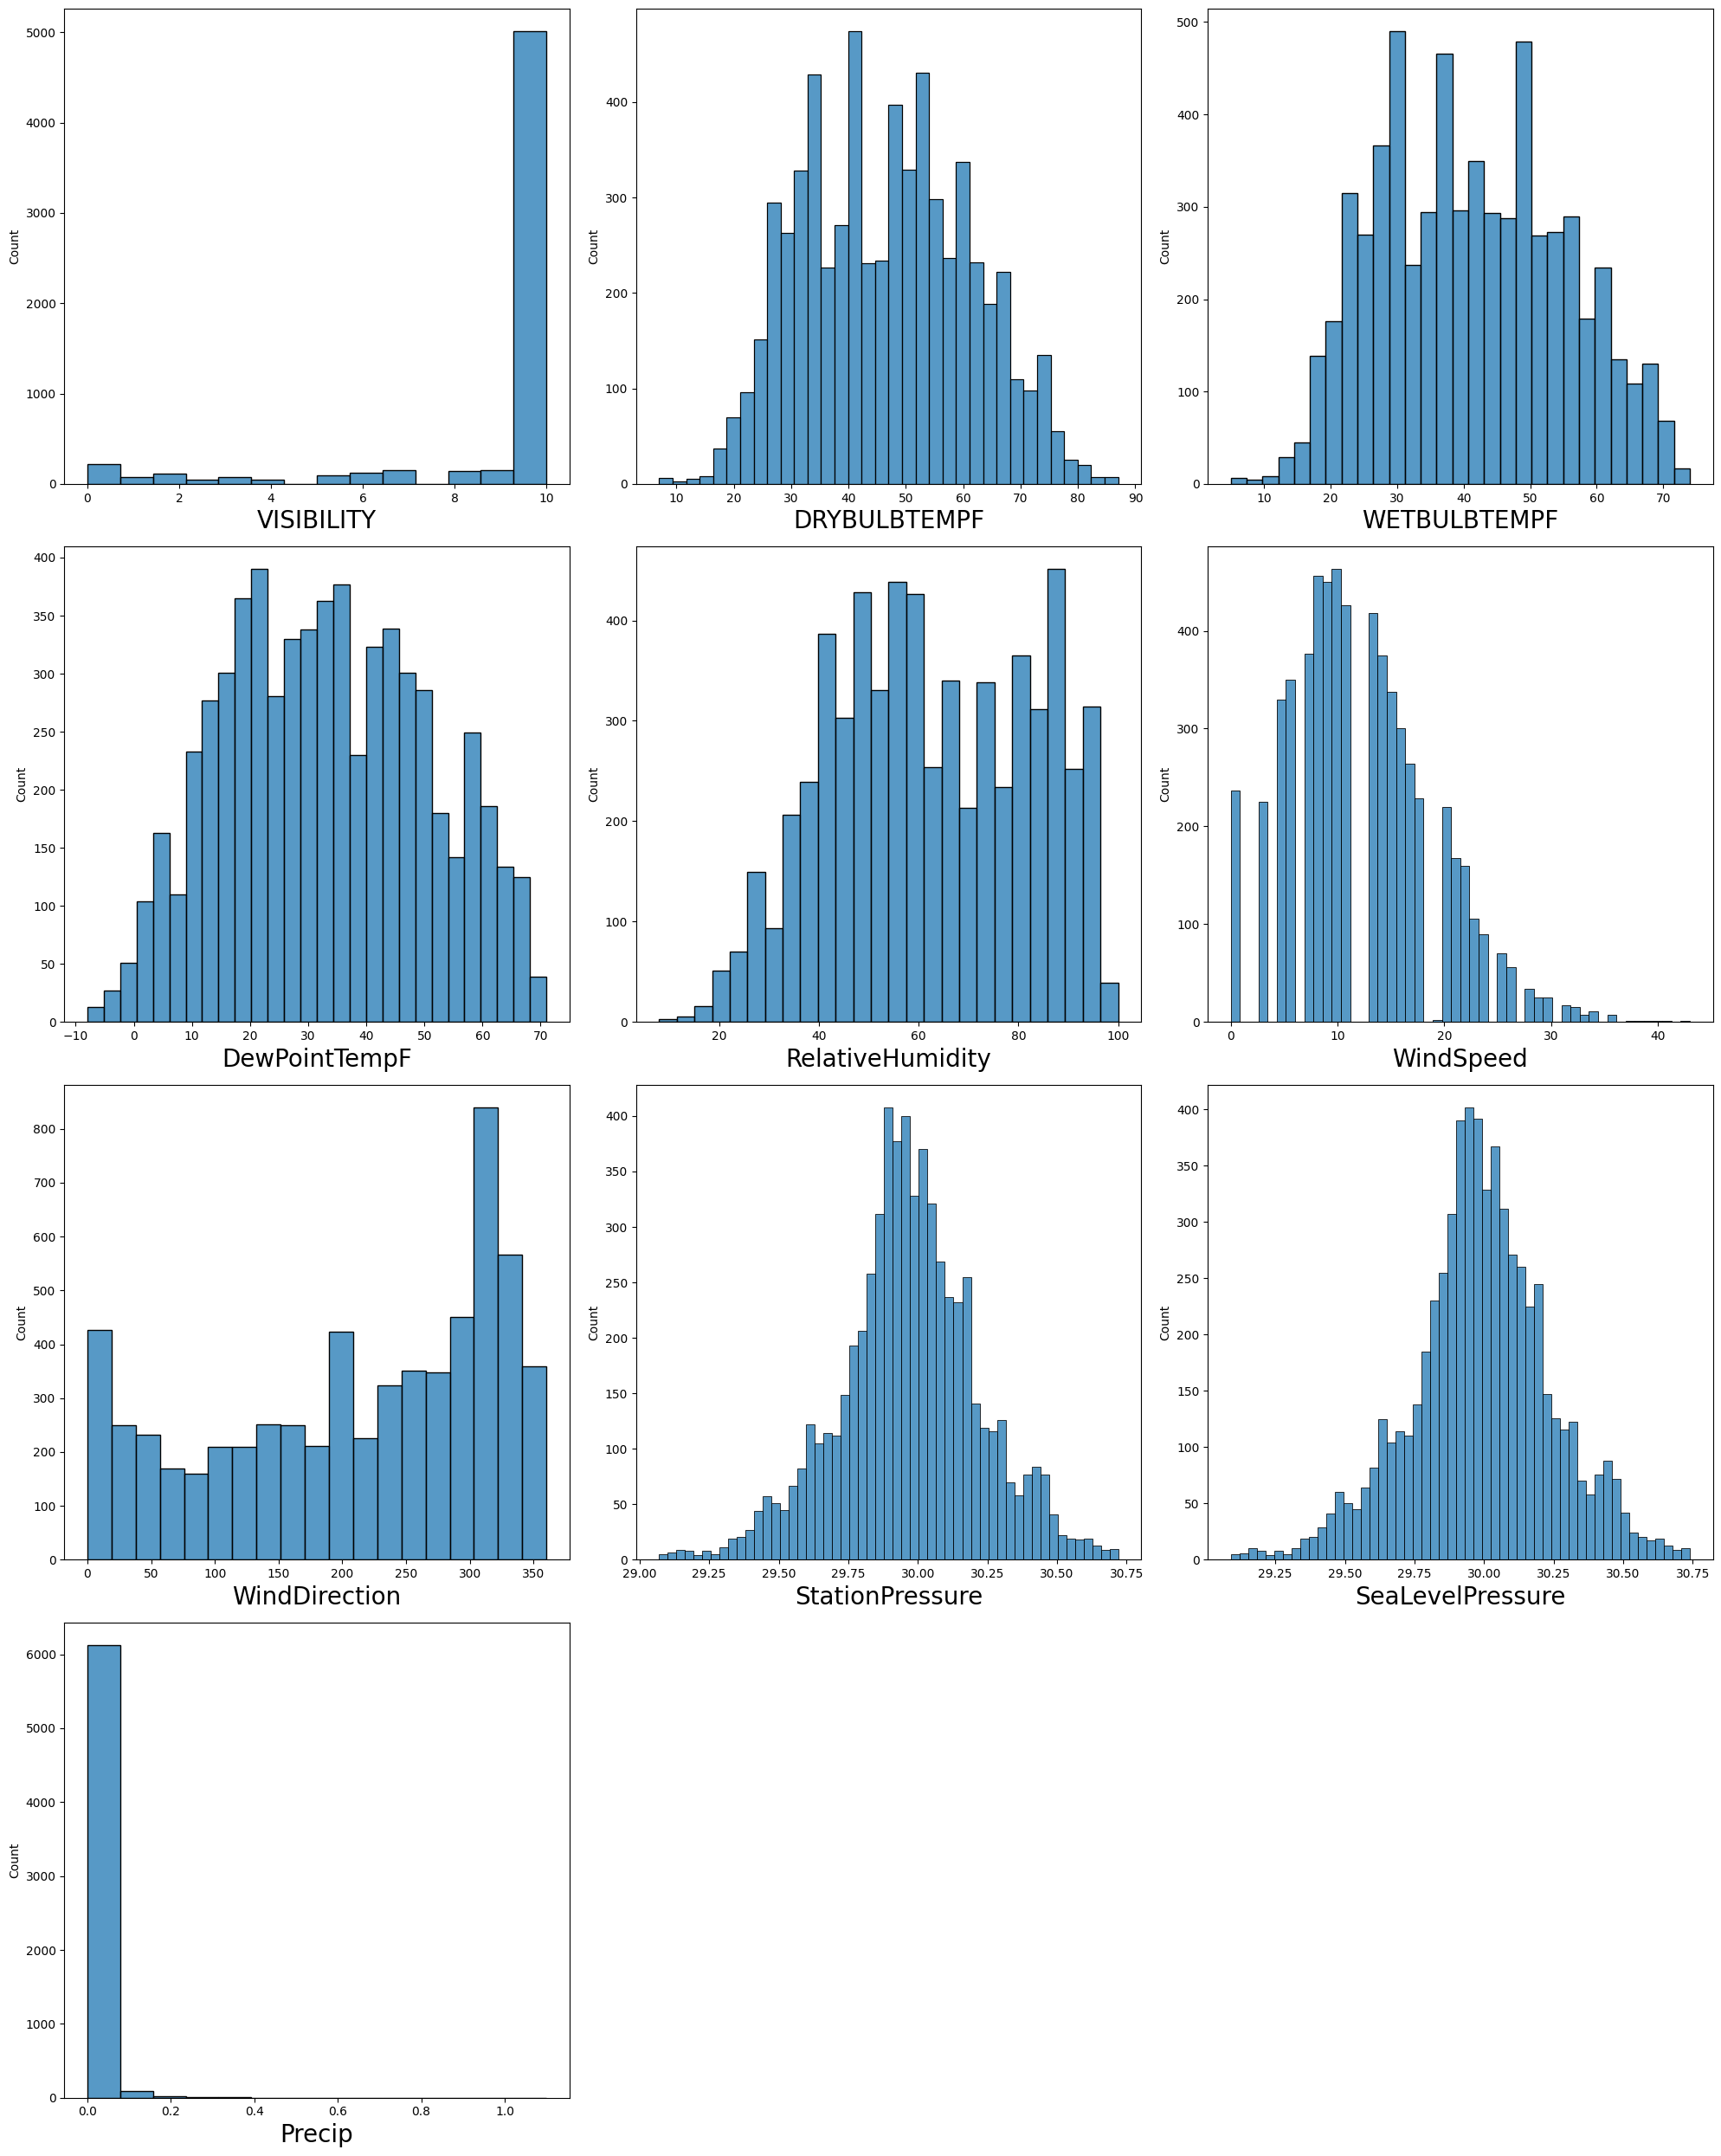

In [16]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df.drop(['DATE'],axis=1):
    ax = plt.subplot(4,3,plotnumber)
    sns.histplot(df[column])
    plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Anomaly Detection

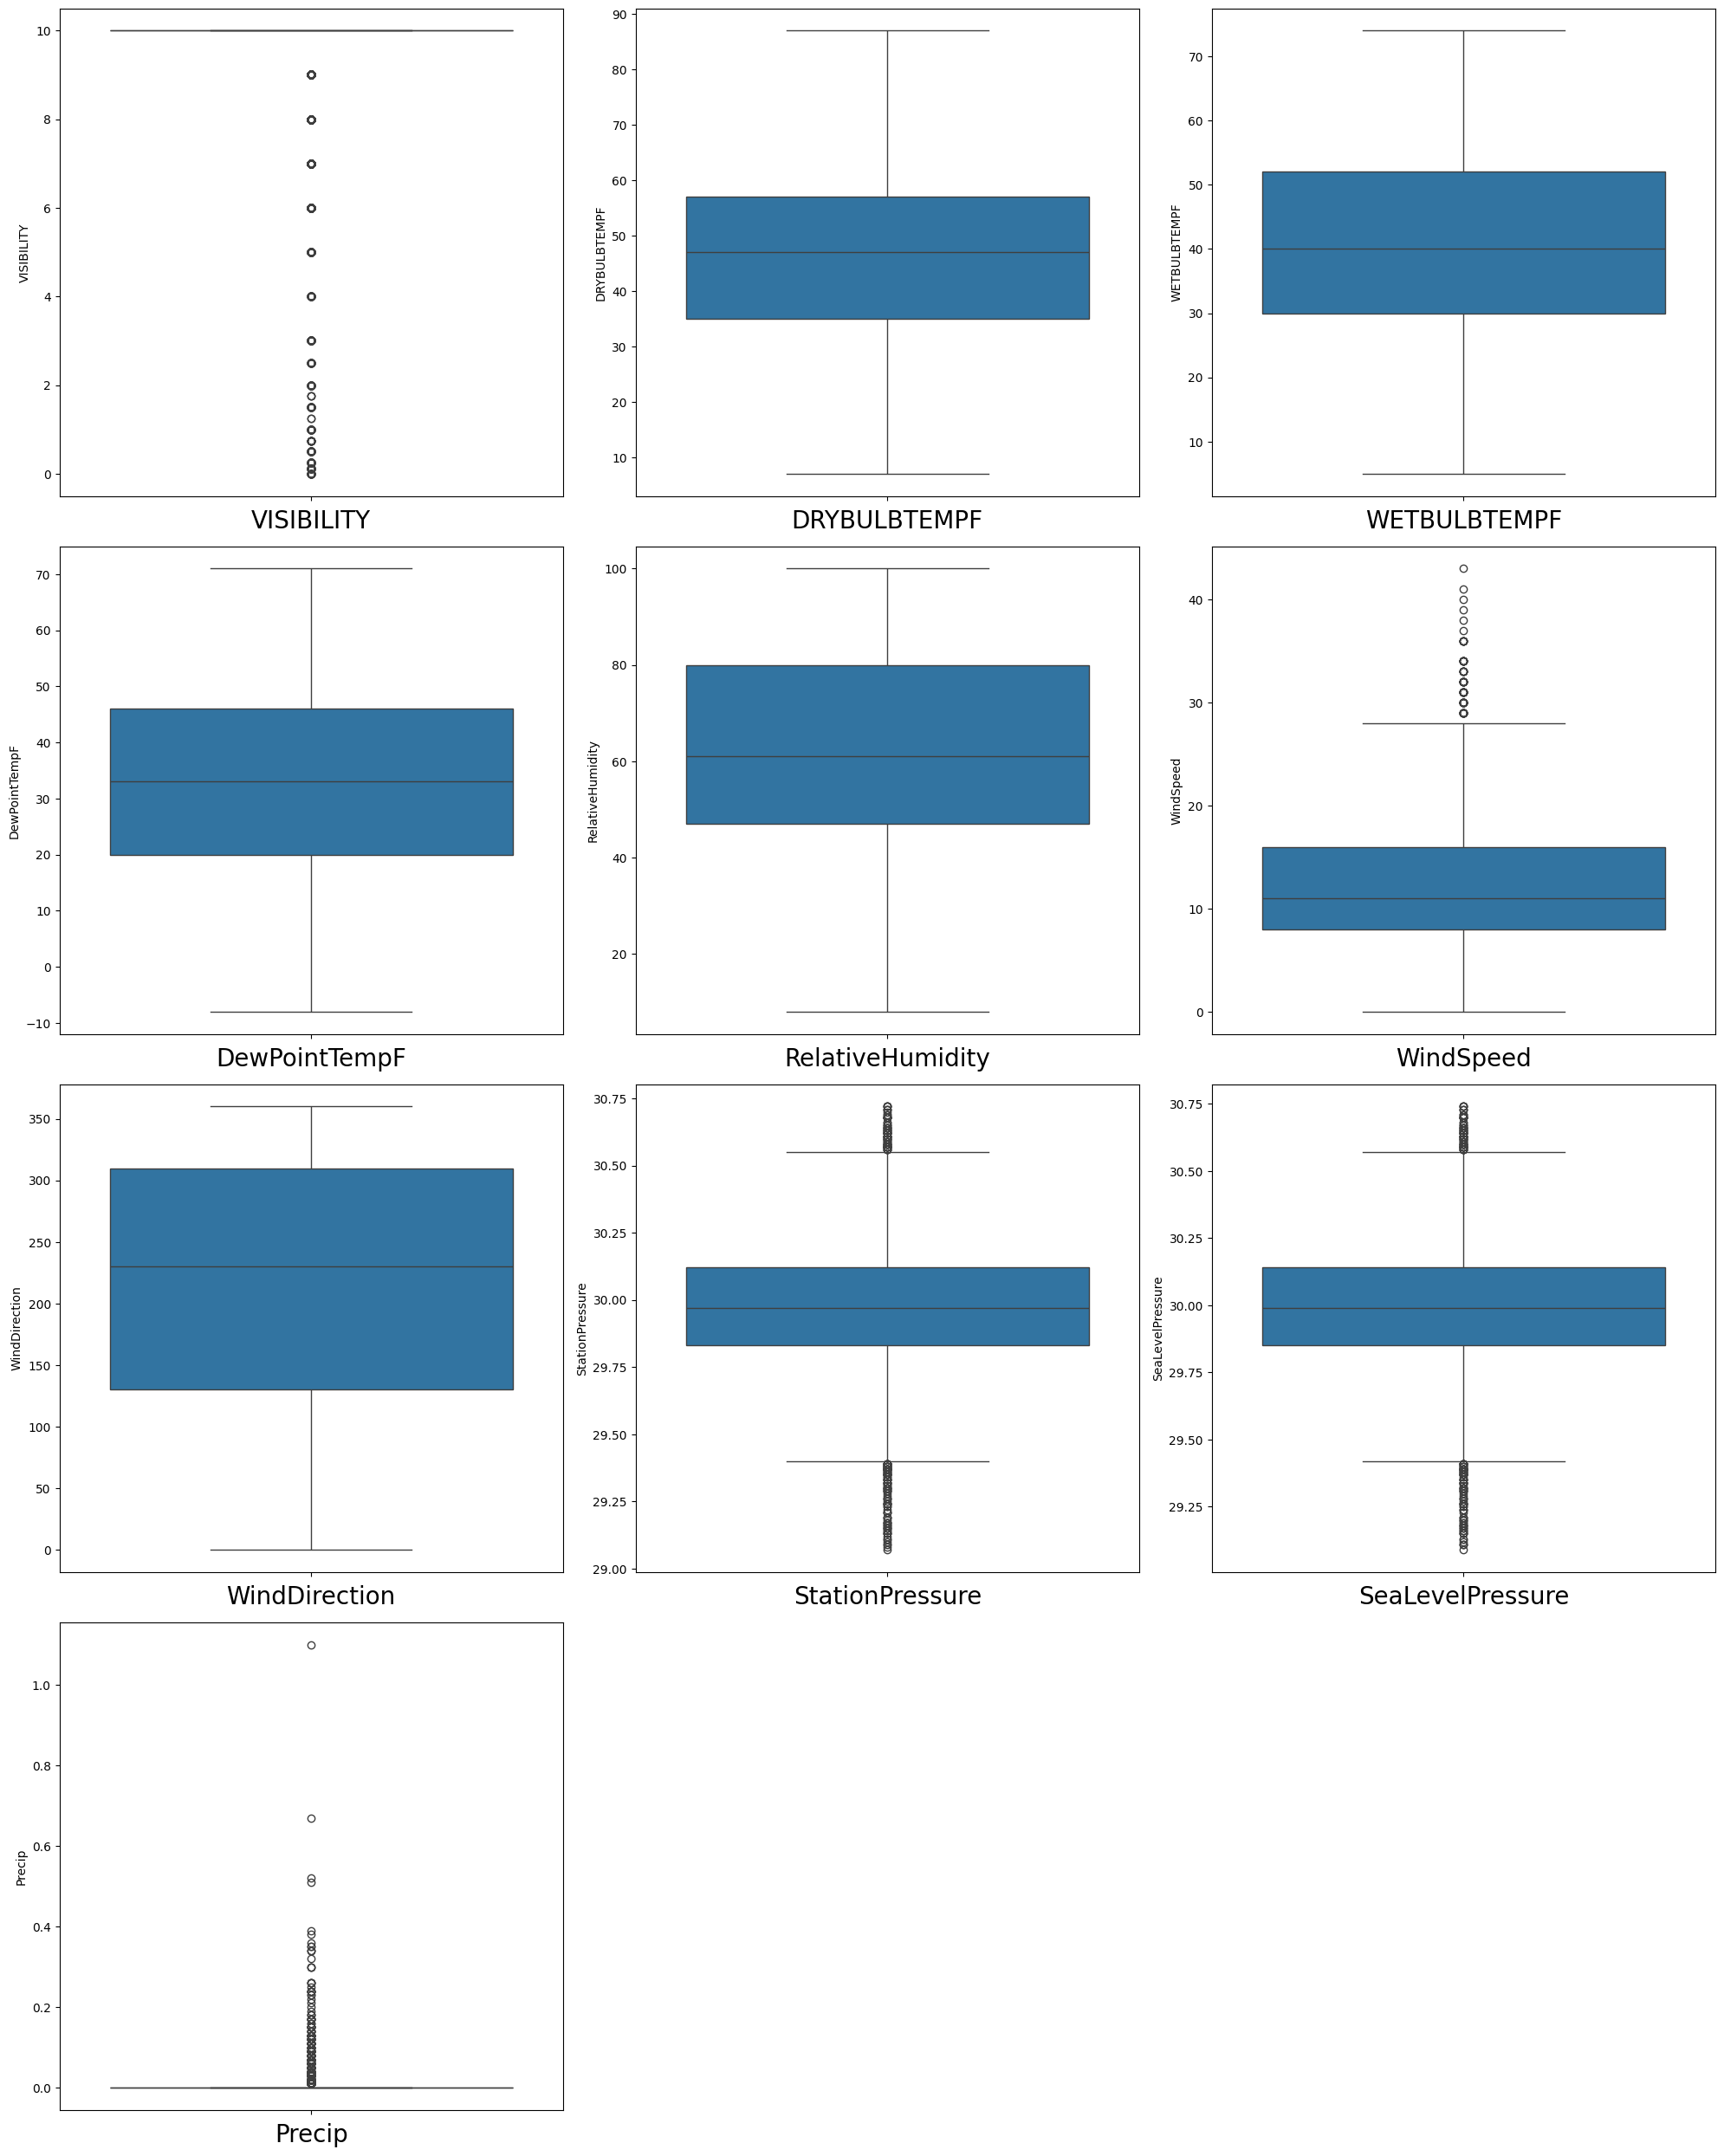

In [17]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df.drop(['DATE'],axis=1):
    ax = plt.subplot(4,3,plotnumber)
    sns.boxplot(df[column])
    plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [18]:
# Here are so much outliers but in this climate visibility predictions , these anomalies are considered so , we'll not try to remove 'em.

Heatmap

In [20]:
X = df.drop(['DATE','VISIBILITY'],axis=1)

<Axes: >

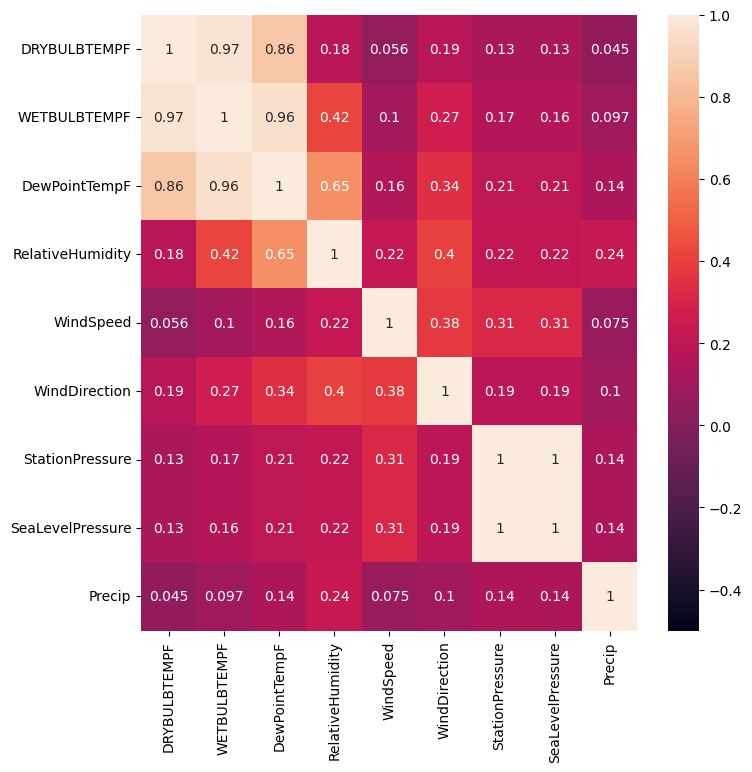

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(X.corr().abs(), vmin = -0.5,vmax = 1,annot=True) 

Here , through the Heatmap we can observe that there are various features that are having a high correlation among them , we can drop them further.